# Supervised Learning Program

In [2]:
import pandas as pd
import numpy as np

In [92]:
df=pd.read_csv("petrol_consumption.csv")

In [93]:
df.describe

<bound method NDFrame.describe of     Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577                         0.529   
9         7.00            4512            8507                         0.552   
10        8.00            4391            5939                         0.530   
11    

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [95]:
df.shape

(48, 5)

In [96]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [97]:
for i in df.columns:
    print(f" columns name : {df[i]},unique values : { df[i].value_counts()}")

 columns name : 0      9.00
1      9.00
2      9.00
3      7.50
4      8.00
5     10.00
6      8.00
7      8.00
8      8.00
9      7.00
10     8.00
11     7.50
12     7.00
13     7.00
14     7.00
15     7.00
16     7.00
17     7.00
18     7.00
19     8.50
20     7.00
21     8.00
22     9.00
23     9.00
24     8.50
25     9.00
26     8.00
27     7.50
28     8.00
29     9.00
30     7.00
31     7.00
32     8.00
33     7.50
34     8.00
35     6.58
36     5.00
37     7.00
38     8.50
39     7.00
40     7.00
41     7.00
42     7.00
43     7.00
44     6.00
45     9.00
46     7.00
47     7.00
Name: Petrol_tax, dtype: float64,unique values : 7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
5.00      1
6.58      1
10.00     1
6.00      1
Name: Petrol_tax, dtype: int64
 columns name : 0     3571
1     4092
2     3865
3     4870
4     4399
5     5342
6     5319
7     5126
8     4447
9     4512
10    4391
11    5126
12    4817
13    4207
14    4332
15    4318
16    4206
17    3718
18    

In [98]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

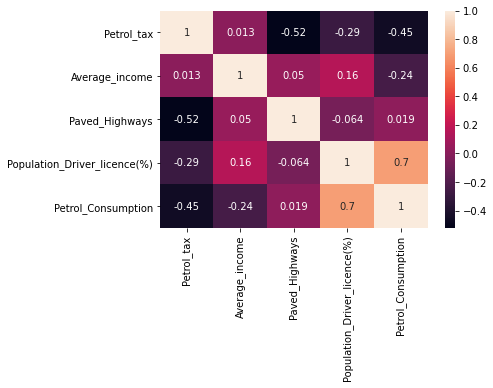

In [100]:
sns.heatmap(df.corr(),annot=True)

In [101]:
x=df.iloc[:,:-1]

In [102]:
x.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572


In [103]:
y=df.iloc[:,-1:]

In [104]:
y.head(2)

,Petrol_Consumption
0,541
1,524


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [107]:
X_train.shape

(33, 4)

In [108]:
X_test.shape

(15, 4)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr=LinearRegression()

In [111]:
lr.fit(X_train,y_train)

LinearRegression()

In [112]:
lr.coef_ 

array([[-4.32002165e+01, -6.72812374e-02, -5.85078038e-03,
         1.33111570e+03]])

In [113]:
lr.intercept_ 

array([470.36371827])

In [114]:
y_pred= lr.predict(X_test)

In [115]:
y_pred

array([[468.31594627],
       [550.39707846],
       [590.63932111],
       [572.1767937 ],
       [649.89394062],
       [648.44378918],
       [515.19865018],
       [674.76463673],
       [503.47637809],
       [500.07361023],
       [417.31504469],
       [587.99614777],
       [624.50820356],
       [605.30052585],
       [563.47052146]])

# Prediction results
# Print model performance

In [116]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error

In [117]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [[-4.32002165e+01 -6.72812374e-02 -5.85078038e-03  1.33111570e+03]]
Intercept: [470.36371827]
Mean squared error (MSE): 3673.21
Coefficient of determination (R^2): 0.29


In [118]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

In [119]:
Dr=regressor.fit(X_train,y_train)

In [120]:
y_pred_dr=Dr.predict(X_test)

In [121]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [[-4.32002165e+01 -6.72812374e-02 -5.85078038e-03  1.33111570e+03]]
Intercept: [470.36371827]
Mean squared error (MSE): 3673.21
Coefficient of determination (R^2): 0.29


In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)

In [124]:
rf.fit(X_train,y_train)

<ipython-input-124-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [125]:
y_pred_rfr=rf.predict(X_test)

In [126]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.2037565566312
Mean Squared Error: 3673.207270692265
Root Mean Squared Error: 60.60699027911108


In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 54.392666666666656
Mean Squared Error: 4136.865859999998
Root Mean Squared Error: 64.31847215225186


In [130]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_dr)))

Mean Absolute Error: 86.53333333333333
Mean Squared Error: 11248.0
Root Mean Squared Error: 106.05658866850281
